In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file= 'DataCoSupplyChainDataset.csv'

***Source of Dataset***
- https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis



- Type Data :
 - Structured Data : DataCoSupplyChainDataset.csv
 - Types of Products : Clothing , Sports , and Electronic Supplies

In [4]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.shape

(180519, 53)

***

# Data Cleaning

- Data cleaning is one of the important processes involved in data analysis, with it being the first step after data collection. It is a very important step in ensuring that the dataset is free of inaccurate or corrupt information. The process of data cleansing may involve the removal of typographical errors, data validation, and data enhancement. This will be done until the data is reported to meet the data quality criteria, which include; validity, accuracy, completeness, consistency, and uniformity. In most cases, some of the datasets collected during research are usually littered with “Corrupted” data, which may lead to unsatisfactory results if used. Hence, the need for scientists to make sure that the data is well-formatted and rid of irrelevancies before it is used.In my data set Data Co Supply Chain Dataset,It required data cleaning.

***Concatenating first and last name so that one could be dropped***

In [7]:
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str) 

In [8]:
#Dropping Columns that are irrelevant and repetitive

df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
# , 'order date (DateOrders)' 'shipping date (DateOrders)',

 **Summary**

 - Data Removed:
     - Zip Code, Product Descriptions are almost only NaN
     - Customer_Email, Customer_Password, Product_Status are not usefull in data
     - Product_Image is not usefull for analysis
     - Customer_Lname, Customer_Fname, Department_Name no need for them as identifiers (already have Customer/Department Id)
     


***

# Delivery Status

## BAR CHART :

In [9]:
data_delivery_status=df.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig = px.bar(  data_delivery_status,   x='Delivery Status' , y='Number of Orders',
    color=data_delivery_status['Number of Orders'], height=500)
fig.show()

In [10]:
total_Orders = data_delivery_status['Number of Orders'].sum()
Percentage_of_late_delivery = (df['Late_delivery_risk'].sum()/total_Orders*100)
Percentage_of_late_delivery

54.82913155955883

***Total Percentage of late Delivery is 54.83***

## PIE CHART:

In [11]:
fig=px.pie(data_delivery_status, names='Delivery Status' , values='Number of Orders',title='Delivery Status',
    color=data_delivery_status['Number of Orders'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

***

## Delivery Status by Region

In [12]:
data_delivery_status_region=df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig= px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  ,
            title="Delivery Status by Regions",color='Order Region', )
fig.show()

***Observation***
 - Central America and Western Europa have the most lated delivered Orders.
 - Central America and Western Europa also have the most shipping cancelation.

- Percentage of late delivery is 54.83. Means, more than 50% products are delivered late. But question why Central America has the highest number of late delivery. After Sales analysis by region I found out central America has the massive number of purchase.So, percentage of late delivery is 54.83. that is why it is showing America has the massive number of late delivery.
This percentage of late delivery can effect the revenue.because customer can move to another company to buy products.

***

## Which Country has the Highest Suspected Fraud

In [13]:
df['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [14]:
suspected_fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']

In [15]:
suspected_fraud=suspected_fraud_df.groupby(['Order Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig= px.bar(suspected_fraud, x='Order Status', y='Number of Orders'  ,
            title="Suspected fraud by Regions",color='Order Region', )
fig.show()

***Observation:***
- Western Europe and Central America have the highest number of suspected fraud cases.


In [16]:
suspected_fraud[(suspected_fraud['Order Region'] == 'Western Europe') & (suspected_fraud['Order Status'] == 'SUSPECTED_FRAUD')]

Order Status    Order Region  Number of Orders
22  SUSPECTED_FRAUD  Western Europe               705

- Total 705 Order are suspected Fraud in Western Europe.

***

# Sales Analysis by Region

In [17]:
data_Region=df.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',title='Total Sales by Region',color ='Number of Orders')

- Central America , Western Europe and South America have the highest number of sales.
- Central Asia has the least number of sales.

***

# Sales Analysis by Country

In [18]:
#Order Country
df_sales_country=df.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

- Estados Unidos Counrty has the highest sales.
- India and Italia have the least sales.

***

## Top 20 Products :

In [19]:
#Product
df_sales_country=df.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(20), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

- Top 20 products by sales.
- Sport goods has the large number of sales.
- Best Seller is Field & Stream Sportsman 16 Gun Fire Safe

## Delivery Status of top 20 Products :

In [20]:
#Product and deliveray status
df_sales_pd=df.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')

- Sports Goods has the massive number of Late Deliveries.
- Sports Goods 1.27M products delivered on Time.
- Sports Goods 1.62M products delivered in Advance.

***

## Top 20 Customers :

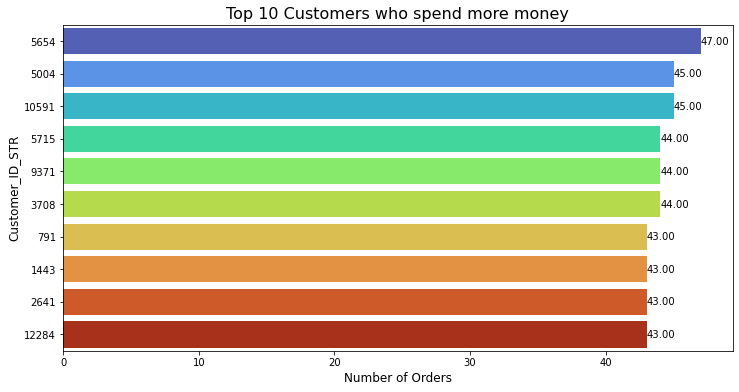

In [21]:
df['Customer_ID_STR']=df['Customer Id'].astype(str)
df1 = df.groupby('Customer_ID_STR')['Order Id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df1.values, y=df1.index, palette='turbo')

plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Top 10 Customers who spend more money', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Customer_ID_STR', fontsize=12)

plt.show()


## Top 20 Customers regarding profit of all orders :

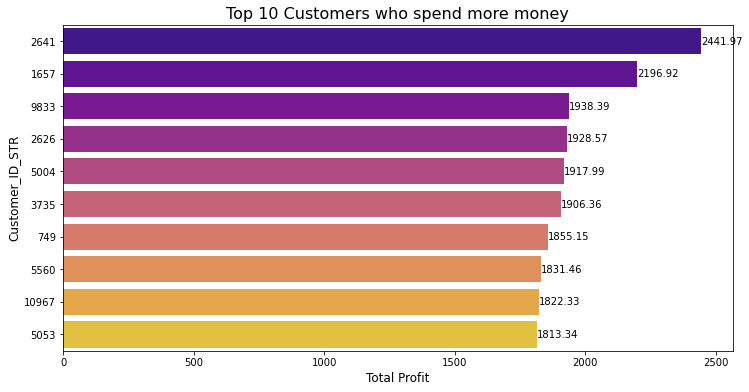

In [22]:
df1 = df.groupby('Customer_ID_STR')['Order Profit Per Order'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df1.values, y=df1.index, palette='plasma')

plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Top 10 Customers who spend more money', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Customer_ID_STR', fontsize=12)

plt.show()

- Customer with Id 2641 is the best Customer regarding profit.

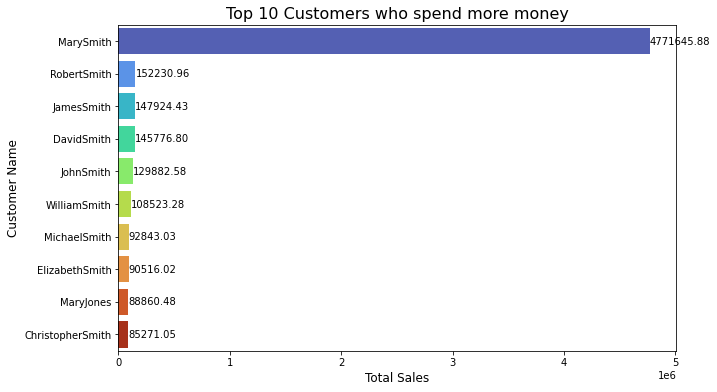

In [23]:
# check top 10 customers who spend more money
df1 = df.groupby('Customer Full Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=df1.values, y=df1.index, palette='turbo')

plt.bar_label(plt.gca().containers[0], fmt='%.2f')
plt.title('Top 10 Customers who spend more money', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

plt.show()

In [24]:
# check top 10 customer those have the highest number of transactions
df['Customer Full Name'].value_counts().head(10)

MarySmith           23884
RobertSmith           744
JamesSmith            726
DavidSmith            723
JohnSmith             645
WilliamSmith          525
ElizabethSmith        476
MaryJones             465
MichaelSmith          460
ChristopherSmith      428
Name: Customer Full Name, dtype: int64

In [25]:
# check total ammount of Sales
df['Sales'].sum()

36784735.01337984

***

# Dist Plot :

# ScatterPlot :

<AxesSubplot:xlabel='Sales per customer', ylabel='Benefit per order'>

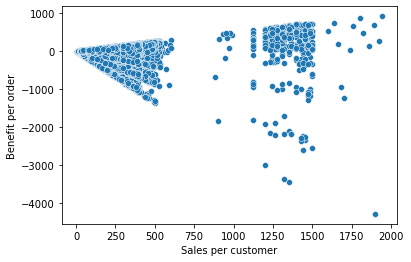

In [26]:
sns.scatterplot(x=df['Sales per customer'],y=df['Benefit per order'])
## Scatter plot for Bivariate Analysis

In [27]:
np.where((df['Sales per customer']>1750) & (df['Benefit per order']>-4000))
# These are outliers

(array([ 13343,  48281,  82117,  82130,  83214, 173436, 175116],
       dtype=int64),)

<AxesSubplot:xlabel='Sales per customer', ylabel='Benefit per order'>

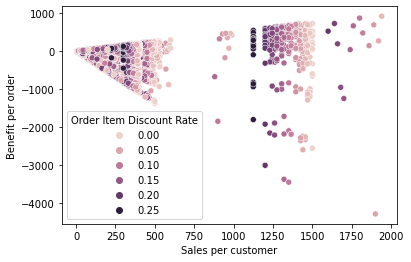

In [28]:
sns.scatterplot(x=df['Sales per customer'],y=df['Benefit per order'],hue=df['Order Item Discount Rate'])
## Scatter plot for Multi-variate Analysis

## Histograms :

<AxesSubplot:xlabel='Sales per customer', ylabel='Count'>

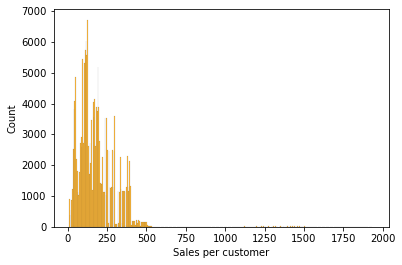

In [29]:
sns.histplot(df['Sales per customer'],color='orange' ,shrink=0.9)

<AxesSubplot:xlabel='Benefit per order', ylabel='Count'>

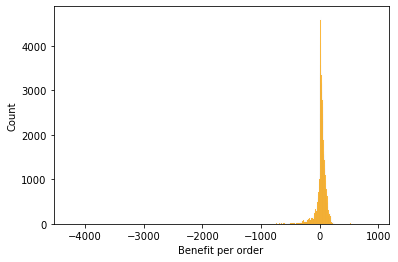

In [30]:
# plt.hist(df['Benefit per order'])
sns.histplot(df['Benefit per order'],color='orange' ,shrink=0.9)

- Benefit per order is rise between(-1000 t0 500)

## DENSITY PLOTS :

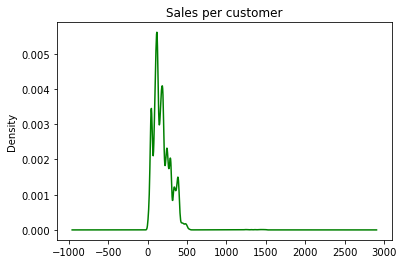

In [31]:
df['Sales per customer'].plot.density(color='green')
plt.title('Sales per customer')
plt.show()

## BoxPlot :

<AxesSubplot:xlabel='Sales per customer'>

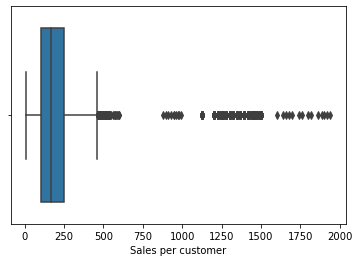

In [32]:
sns.boxplot(x=df['Sales per customer'])

- Finding Outliers

In [33]:
outlier=np.where(df['Sales per customer']>750)

In [34]:
outlier

(array([   152,    155,    160,    172,    174,   1353,   1370,   1375,
          1594,   3204,   3495,   3496,   3976,   5774,   7951,   7960,
          7961,   8259,   8260,   9601,   9603,   9611,  10892,  11285,
         11812,  11813,  11814,  11907,  11908,  11909,  11910,  12516,
         12517,  12518,  12524,  12527,  12528,  12531,  12534,  12537,
         12540,  12544,  12545,  12546,  12547,  12548,  12550,  12551,
         12552,  12557,  12558,  12559,  12567,  12606,  13333,  13343,
         15852,  16147,  16150,  17041,  17043,  17045,  17047,  17050,
         17052,  17053,  17058,  17403,  17975,  17977,  17982,  18148,
         18149,  18545,  18546,  18547,  18548,  18549,  18550,  18551,
         18553,  18554,  18798,  20846,  20849,  20850,  20855,  21449,
         21450,  23413,  24584,  24587,  24588,  24768,  26354,  26356,
         26363,  26365,  26592,  28123,  29266,  29267,  29596,  30194,
         30495,  33844,  33845,  33846,  35686,  35689,  35690, 

## Payment Types:

In [35]:
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

<AxesSubplot:xlabel='Type', ylabel='Count'>

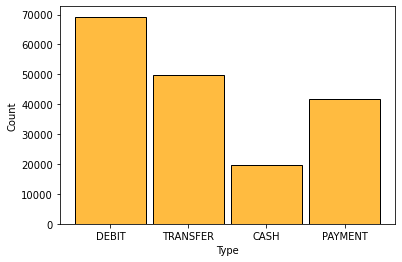

In [36]:
sns.histplot(df['Type'],color='orange' ,shrink=0.9)

In [37]:
Type_of_payment=df.groupby(['Type'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
fig=px.pie(Type_of_payment, names='Type' , values='Number of Orders',title='Types of Payment',
    color=data_delivery_status['Number of Orders'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- 38.4% people prefer Debit way of payment

## Heat Map for correlation matrix:

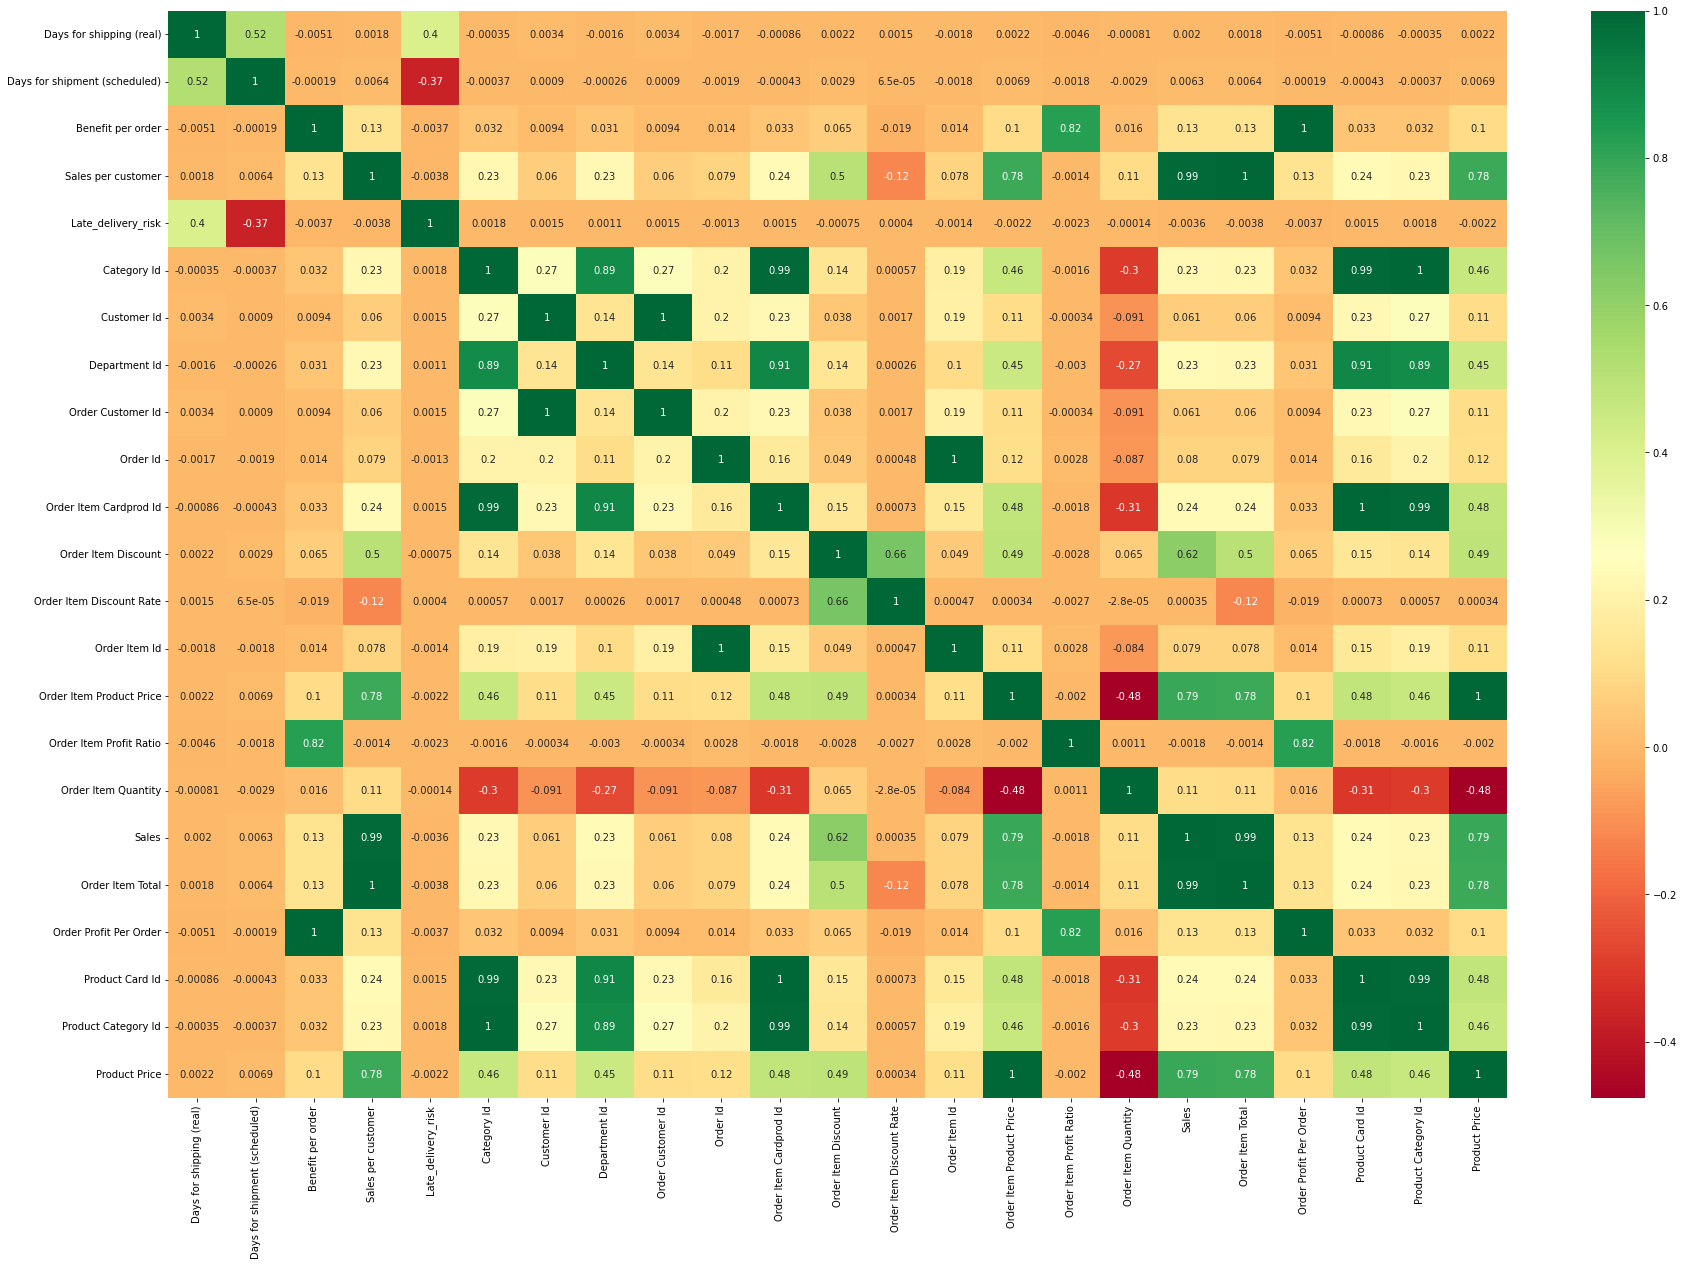

In [38]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")

## Insights from Heatmap:
### 1. Columns that are similar with same values but with different metadata (duplicate columns)

- [Benefit per order], Order Profit per order
- [Sales per customer], Sales, Order Item Total
- [Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
- [Order Item Product Price],Product Price


***

## Statistical Analysis

In [39]:
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Department Id  Order Customer Id  \
count  180519.000000  180519.000000  180519.000000      180519.000000   
mean       31.851451    6691.379495       5.443460        6691.379495   
std        15.640064    4162.918106       1.629246        4162.918106   
min         2.000000       1.000000       2.000000           1.000000   
25%        18.000000    3258.500000       4.000000        3258.500000   
50%        29.000000    6457.000000       5.000000        6457.000000   
75%        45.000000    9779.000000       7.000000        9779.000000   
max        76.000000   20757.000000      12.000000       20757.000000   

            Order Id  ...  Order Item Id  Order Item Product Price  \
count  180519.000000  ...  180519.000000             180519.000000   
mean    36221.894903  ...   90260.000000                141.232550   
std     21045.379569  ...   52111.490959                139.732492   
min         1.000000  ...       1.000000                  9.990000   
25%     18057.000000  ...   45130.500000                 50.000000   
50%     36140.000000  ...   90260.000000                 59.990002   
75%     54144.000000  ...  135389.500000                199.990005   
max     77204.000000  ...  180519.000000               1999.989990   

       Order Item Profit Ratio  Order Item Quantity          Sales  \
count            180519.000000        180519.000000  180519.000000   
mean                  0.120647             2.127638     203.772096   
std                   0.466796             1.453451     132.273077   
min                  -2.750000             1.000000       9.990000   
25%                   0.080000             1.000000     119.980003   
50%                   0.270000             1.000000     199.919998   
75%                   0.360000             3.000000     299.950012   
max                   0.500000             5.000000    1999.989990   

       Order Item Total  Order Profit Per Order  Product Card Id  \
count     180519.000000           180519.000000    180519.000000   
mean         183.107609               21.974989       692.509764   
std          120.043670              104.433526       336.446807   
min            7.490000            -4274.979980        19.000000   
25%          104.379997                7.000000       403.000000   
50%          163.990005               31.520000       627.000000   
75%          247.399994               64.800003      1004.000000   
max         1939.989990              911.799988      1363.000000   

       Product Category Id  Product Price  
count        180519.000000  180519.000000  
mean             31.851451     141.232550  
std              15.640064     139.732492  
min               2.000000       9.990000  
25%              18.000000      50.000000  
50

# Calculate average sales per day, per month and per year

In [40]:
#Setting date format for columns containing dates

df['Order Date'] = pd.to_datetime(df['order date (DateOrders)'],infer_datetime_format=True)
df['Ship Date'] = pd.to_datetime(df['shipping date (DateOrders)'],infer_datetime_format=True)

In [41]:
#Sort Data
df.sort_values('Order Date', inplace=True)

In [42]:
#Adding colums containing year and month of orders
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [43]:
print('The mean of sale per day is: ',round(df.groupby('Order Date')['Sales'].sum().mean(),2))
print('The average sales per month is: ', round(df.groupby(['Order Year','Order Month'])['Sales'].sum().mean(),2))
print('The average sales per year is: ', round(df.groupby('Order Year')['Sales'].sum().mean(),2))

The mean of sale per day is:  559.45
The average sales per month is:  994182.03
The average sales per year is:  9196183.75


# Calucate the standard deviation of sales per day, per month and per year

In [44]:
print('The standard derviation of sales per day is: ',round(df.groupby('Order Year')['Sales'].sum().std(),2))
print('The standard deviation of sales per month is: ', round(df.groupby(['Order Year','Order Month'])['Sales'].sum().std(),2))
print('The standard deviation of sales per year is: ', round(df.groupby('Order Year')['Sales'].sum().std(),2))

The standard derviation of sales per day is:  5914671.44
The standard deviation of sales per month is:  161149.66
The standard deviation of sales per year is:  5914671.44


In [45]:

print(f"The relative standard deviation of sales per month is: {round(df.groupby(['Order Year','Order Month'])['Sales'].sum().std()/df.groupby(['Order Year','Order Month'])['Sales'].sum().mean()*100,2)}%")
print(f"The relative standard deviation of sales per year is: {round(df.groupby('Order Year')['Sales'].sum().std()/df.groupby('Order Year')['Sales'].sum().mean()*100,2)}%")

The relative standard deviation of sales per month is: 16.21%
The relative standard deviation of sales per year is: 64.32%


# The mode of Ship Mode per year and per month

In [46]:
print('Most common ship mode per year:',df.groupby('Order Year')['Shipping Mode'].agg(pd.Series.mode))

Most common ship mode per year: Order Year
2015    Standard Class
2016    Standard Class
2017    Standard Class
2018    Standard Class
Name: Shipping Mode, dtype: object


# Total Sales per year

Text(0.5, 1.0, 'Total sales per year')

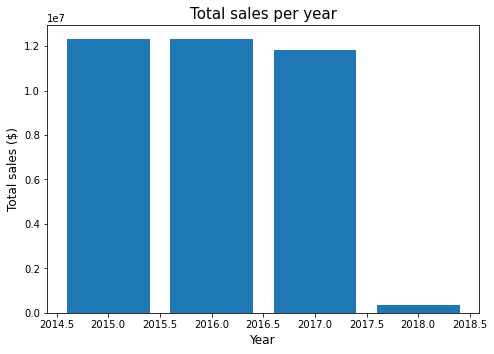

In [47]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,1])
axes.bar(np.array(df.groupby('Order Year')['Sales'].sum().index),np.array(df.groupby('Order Year')['Sales'].sum()))
axes.set_xlabel('Year',fontsize=12)
axes.set_ylabel('Total sales ($)',fontsize=12)
axes.set_title('Total sales per year',fontsize=15)

Text(0.5, 0, 'Frequencies')

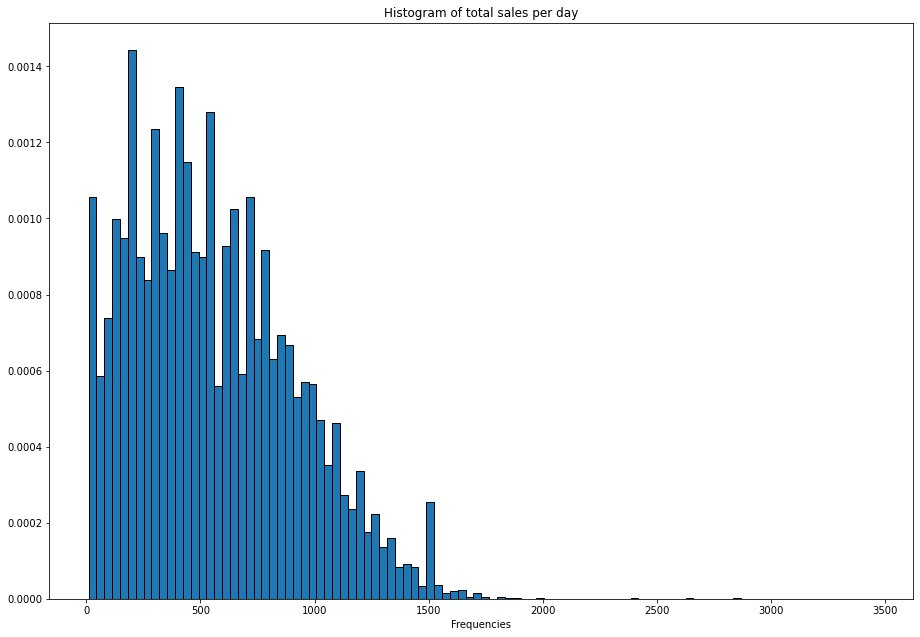

In [48]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
axes.hist(df.groupby('Order Date')['Sales'].sum(),bins=100,density=True,ec='black')
axes.set_title('Histogram of total sales per day')
axes.set_xlabel('Frequencies')

In [49]:
#Apparently the histogram is skewed to the right

In [50]:
Pearson_coeff = (df.groupby('Order Date')['Sales'].sum().mean()-df.groupby('Order Date')['Sales'].sum().median())*3 \
/df.groupby('Order Date')['Sales'].sum().std()
print('Person coefficient of skewness is equal to:',round(Pearson_coeff,2))

Person coefficient of skewness is equal to: 0.46


In [51]:
bx = df.groupby(['Order Year','Order Date'])['Sales'].sum()
L= [bx.loc[j] for j in range(2015,2019)]
Lx = [j for j in range(2015,2019)]

Text(0, 0.5, 'Daily sales value')

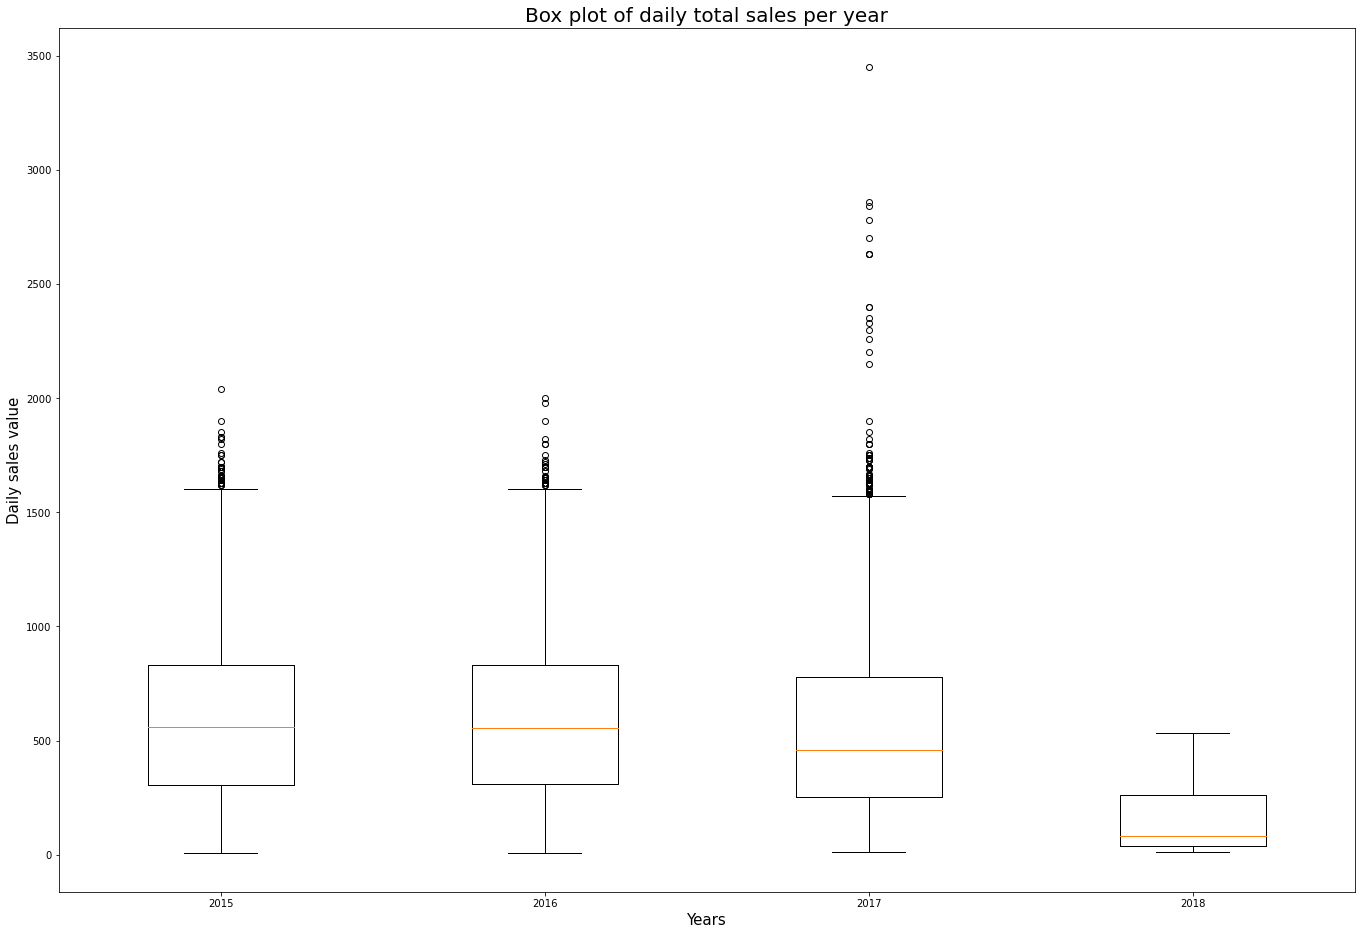

In [52]:
fig4 = plt.figure()
axes = fig4.add_axes([0.1,0.1,3,3])
axes.boxplot(L,labels=Lx)
axes.set_title('Box plot of daily total sales per year',fontsize=20)
axes.set_xlabel('Years',fontsize=15)
axes.set_ylabel('Daily sales value',fontsize=15)

In [53]:
df['Shipping Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

Text(0.5, 1.0, 'Pie chart of ship modes')

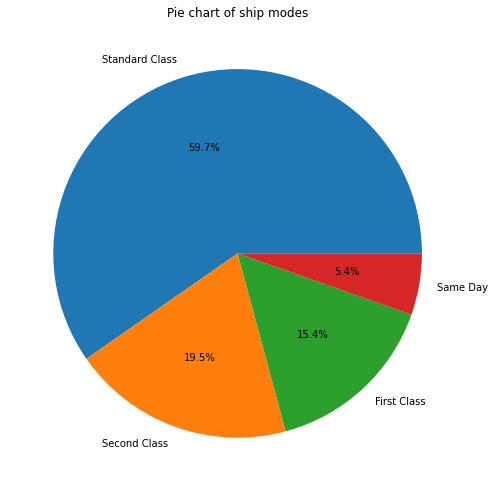

In [54]:
fig = plt.figure(figsize=(8,8))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.pie(df['Shipping Mode'].value_counts(),labels=df['Shipping Mode'].value_counts().index,autopct='%1.1f%%')
axes.set_title('Pie chart of ship modes')

***